In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [47]:
# creating the sample
sample_size = 20
x = np.random.randn(sample_size)
y = (2*x) + np.random.randn(sample_size)

<AxesSubplot:>

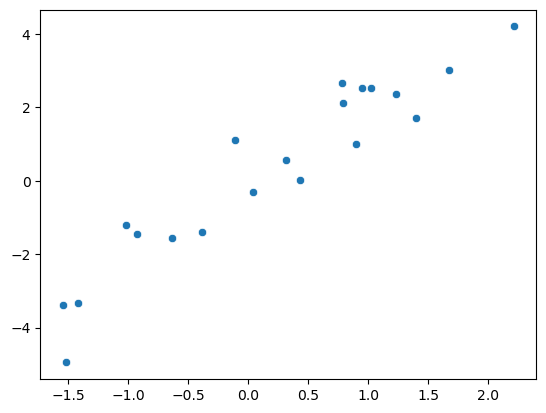

In [48]:
sns.scatterplot(x=x, y=y)

In [49]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-1.519949,-4.948994
1,-0.927906,-1.460925
2,-1.020354,-1.203637
3,-1.544158,-3.371092
4,1.024511,2.527889


In [50]:
df.corr()

,x,y
x,1.000000,0.947962
y,0.947962,1.000000


In [51]:
# calculating correlation r:
def correlation(x, y) :
    SP_xy = np.sum((x - x.mean()) * (y - y.mean()))
    SS_x = np.sum( np.power((x - x.mean()), 2) )
    SS_y = np.sum( np.power((y - y.mean()), 2) )
    r = (SP_xy) / np.power(SS_x * SS_y, 0.5)
    return r

In [52]:
correlation(x, y)

0.9479621525243083

In [53]:
# regression line  --> y = bx + a
r = correlation(x, y)
SS_x = np.sum( np.power((x - x.mean()), 2) )
SS_y = np.sum( np.power((y - y.mean()), 2) )

b = r * np.power(SS_y/SS_x, 0.5)
a = y.mean() - (b * x.mean())

# y' = bx + a --> np.polyval(np.array([b, a]), x)

In [54]:
def predict(x) :
    return np.polyval(np.array([b, a]), x)

In [55]:
x_ = np.arange(-5, 5)
y_ = np.array(
    [predict(i) for i in x_]
)

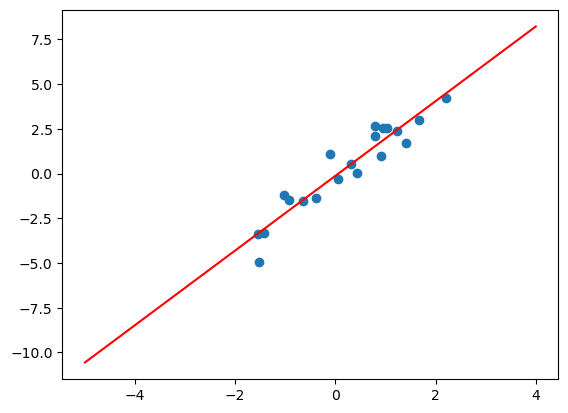

In [56]:
plt.scatter(x=x, y=y)
plt.plot(x_, y_, color='red')
plt.show()

### let's predict :)

In [61]:
actual_x = np.random.randn()
actual_y = (2*actual_x) + np.random.randn() # the function we used to produce y for our data
actual_x, actual_y

(-0.34934575985431987, -0.8194573046216274)

In [62]:
predict(actual_x)

-0.8508987823240906

<br></br>
as you can see, the answer is not axactly the same as the actual output,<br>
now we will read about the **error of our prediction**

## standard error of estimate

it measures the average deviation of the residuals (the differences between the actual and predicted values) in the regression model.<br>
The SEE is used to assess the goodness of fit of the regression model. A smaller SEE indicates a better fit and more accurate predictions, while a larger SEE indicates a poorer fit and less accurate predictions



**a rough measure of the average amount by which known Y values deviate from their predictedY values.**

In [65]:
# calculate SEE for our example :
n = sample_size
SEE = np.power( (SS_y * (1 - r**2)) / (n - 2), 0.5)
SEE

0.8053402904268985

so the actual Y should be in range of predicted Y +-SEE :

In [71]:
predicted_y = predict(actual_x)
actual_y in np.arange(predicted_y-SEE, predicted_y+SEE)

False

In [72]:
actual_y

-0.8194573046216274

In [73]:
np.arange(predicted_y-SEE, predicted_y+SEE)

array([-1.65623907, -0.65623907])

In [75]:
np.logical_and(predicted_y-SEE <= actual_y, actual_y <= predicted_y+SEE)

True

### two important points :
- linearity
- Homoscedasticity

## r^2
- **measure of predictive accuracy**<br>
- ***r2, always indicates the proportion of total variability in one variable that is predictable from its relationship with the other variable.*** --> if r^2 is 0.64, it means that 64 percent of the y is predictable from x

The r^2 value ranges from 0 to 1, with a value of 1 indicating that the regression model perfectly fits the data, and a value close to 0 indicating that the model does not fit the data well.

## regression toward the mean